## 1.3.1 Задание
### Задача:
<p>Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
расстояния по описанным в примере выше метрикам. Отобразите точки
в трехмерном пространстве.

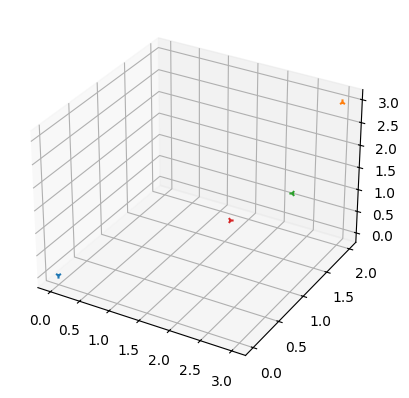

Расстояние между 1 и 2 точкой:
4.69041575982343
22.0
3.0
8.0
Расстояние между 1 и 3 точкой:
3.7416573867739413
14.0
3.0
6.0
Расстояние между 1 и 4 точкой:
2.449489742783178
5.999999999999999
2.0
4.0
Расстояние между 2 и 3 точкой:
1.4142135623730951
2.0000000000000004
1.0
2.0
Расстояние между 2 и 4 точкой:
2.449489742783178
5.999999999999999
2.0
4.0
Расстояние между 3 и 4 точкой:
1.4142135623730951
2.0000000000000004
1.0
2.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

point1 = ax.scatter(0,0,0, marker = "1")
point2 = ax.scatter(3,2,3, marker = "2")
point3 = ax.scatter(3,1,2, marker = "3")
point4 = ax.scatter(2,1,1, marker = "4")

x = np.array([0,0,0])
y = np.array([3,2,3])
z = np.array([3,1,2])
w = np.array([2,1,1])

plt.show()

print("Расстояние между 1 и 2 точкой:")
print(np.linalg.norm(x-y))
print(np.linalg.norm(x-y) ** 2)
print(np.linalg.norm(x-y, ord = np.inf))
print(np.linalg.norm(x-y, ord=1))

print("Расстояние между 1 и 3 точкой:")
print(np.linalg.norm(x-z))
print(np.linalg.norm(x-z) ** 2)
print(np.linalg.norm(x-z, ord = np.inf))
print(np.linalg.norm(x-z, ord=1))

print("Расстояние между 1 и 4 точкой:")
print(np.linalg.norm(x-w))
print(np.linalg.norm(x-w) ** 2)
print(np.linalg.norm(x-w, ord = np.inf))
print(np.linalg.norm(x-w, ord=1))

print("Расстояние между 2 и 3 точкой:")
print(np.linalg.norm(y-z))
print(np.linalg.norm(y-z) ** 2)
print(np.linalg.norm(y-z, ord = np.inf))
print(np.linalg.norm(y-z, ord=1))

print("Расстояние между 2 и 4 точкой:")
print(np.linalg.norm(y-w))
print(np.linalg.norm(y-w) ** 2)
print(np.linalg.norm(y-w, ord = np.inf))
print(np.linalg.norm(y-w, ord=1))

print("Расстояние между 3 и 4 точкой:")
print(np.linalg.norm(w-z))
print(np.linalg.norm(w-z) ** 2)
print(np.linalg.norm(w-z, ord = np.inf))
print(np.linalg.norm(w-z, ord=1))

## 2.3.1 Задание
### Задача: 
<p>Для предыдущего примера поэкспериментируйте с параметрами
классификатора:
<p>1. Установите другое количество ближайших соседей (k = 1, 5, 10).
<p>2. Установите размер тестовой выборки 15% от всего датасета.
<p>3. Постройте графики и оцените качество моделей, проанализируйте
результаты.

In [9]:
!pip install scikit-learn
!pip install seaborn

     sepal_length  sepal_width  petal_length  petal_width
136           6.3          3.4           5.6          2.4
130           7.4          2.8           6.1          1.9
128           6.4          2.8           5.6          2.1
125           7.2          3.2           6.0          1.8
28            5.2          3.4           1.4          0.2
136    virginica
130    virginica
128    virginica
125    virginica
28        setosa
Name: species, dtype: object
['virginica' 'versicolor' 'virginica' 'virginica' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'versicolor' 'setosa' 'versicolor' 'setosa' 'setosa']
accuracy: 1.0
['virginica' 'versicolor' 'virginica' 'virginica' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'versicolor' 'setosa' 'versicolor' 'seto

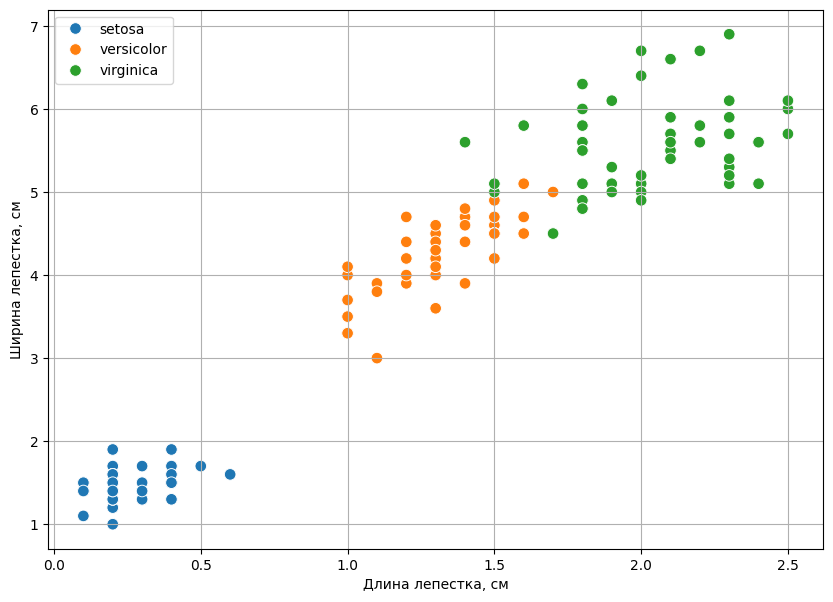

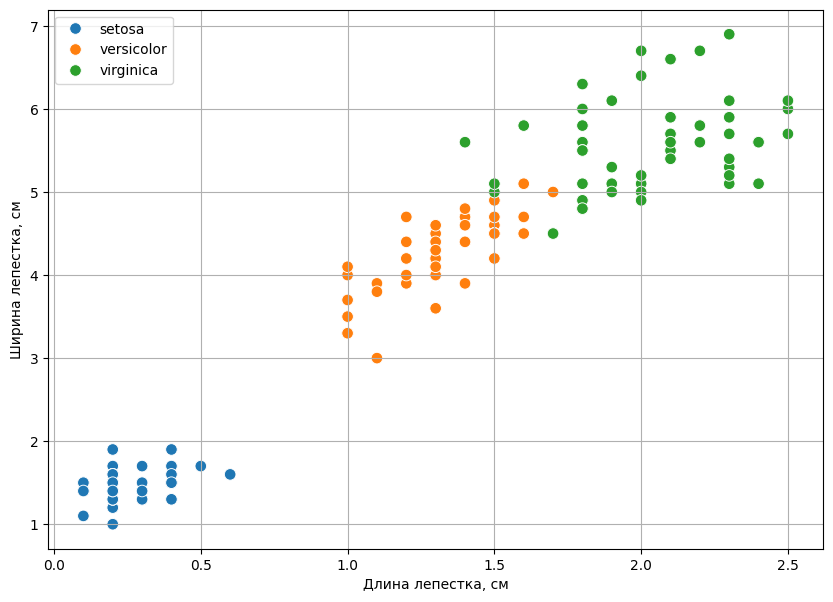

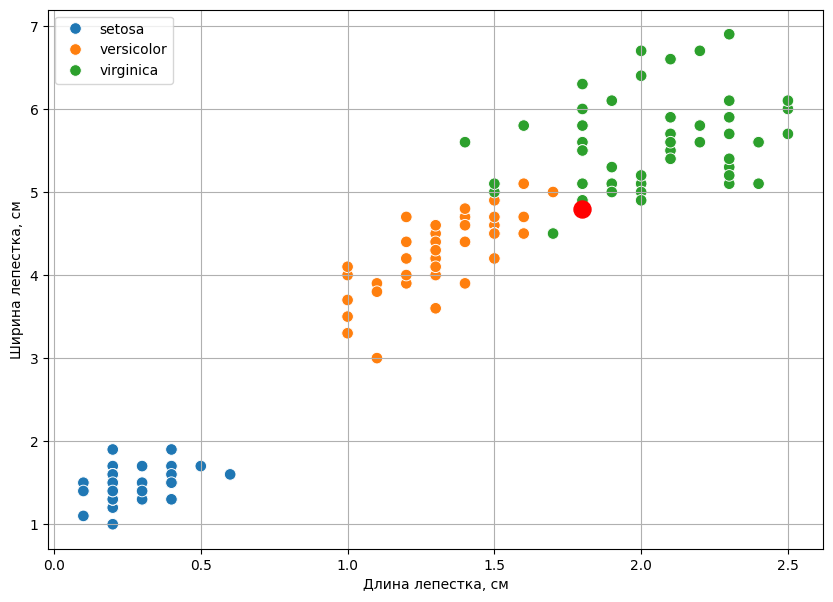

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
iris = sns.load_dataset('iris')
x_train, x_test, y_train, y_test = train_test_split(iris.iloc[:,:-1], iris.iloc[:,-1], test_size=0.15)
x_train.shape,  x_test.shape, y_train.shape, y_test.shape
print(x_train.head())
print(y_train.head())
k = [1, 5, 10]
for i in k:
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)
  print(y_pred)

  plt.figure(figsize=(10,7))
  sns.scatterplot(
      data=iris,
      x = 'petal_width', y = 'petal_length',
      hue='species',
      s=70)

  plt.xlabel('Длина лепестка, см')
  plt.ylabel('Ширина лепестка, см')
  plt.legend(loc=2)
  plt.grid()

  for i in range(len(y_test)):
      if np.array(y_test)[i] != y_pred[i]:
          plt.scatter(x_test.iloc[i,3],x_test.iloc[i,2], color='red', s=150)

  from sklearn.metrics import accuracy_score
  print(f'accuracy: {accuracy_score(y_test, y_pred):.3}')

## 3.3.2 Задание
### Задача: 
<p>Определите набор признаков человека, по аналогии из РТ 1, – например,
цвет глаз и конвертируйте его в матрицу признаков.

In [11]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{"карий": 5, "голубой":1, "серый":2},
            {"карий": 3, "зеленый":4, "серый":4},
            {"зеленый": 2, "голубой":5, "серый":2},
            {"карий": 3, "голубой":4, "зеленый":4}]

dictvectorizer = DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(data_dict)
features

array([[1., 0., 5., 2.],
       [0., 4., 3., 4.],
       [5., 2., 0., 2.],
       [4., 4., 3., 0.]])